In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [9]:
iris = pd.read_excel("iris.xls")
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
X_train = iris[['petalwidth', 'petallength']]

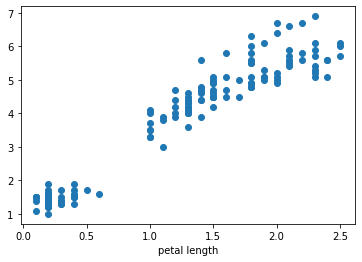

In [22]:
plt.scatter( iris.petalwidth, iris.petallength)
plt.xlabel("petal width")
plt.xlabel("petal length")
plt.show()

In [23]:
gmm = GaussianMixture(n_components= 3)
gmm.fit(X_train)

GaussianMixture(n_components=3)

In [24]:
print(gmm.weights_)

[0.35199252 0.3146746  0.33333288]


In [25]:
print(gmm.covariances_)

[[[0.04585074 0.08489917]
  [0.08489917 0.24667106]]

 [[0.07200287 0.04402642]
  [0.04402642 0.30034404]]

 [[0.01126496 0.00558393]
  [0.00558393 0.02950483]]]


In [26]:
types = gmm.predict(X_train)
types

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [27]:
X_now = [[0.4, 1.5], [1.6, 4.5], [2, 5.7]]
y_now = gmm.predict(X_now)
y_now

array([2, 0, 1], dtype=int64)

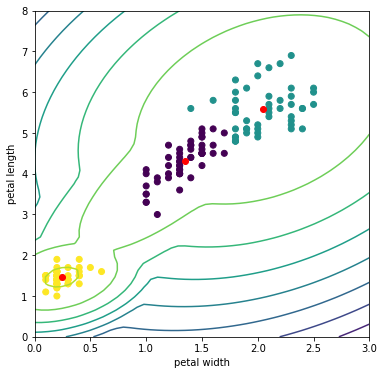

In [33]:
#plot the mixture of Gaussians
#ve ra cac luoi the hien 1 std, 2std
plt.figure(figsize=(6,6))
X, Y = np.meshgrid(np.linspace(0, 3), np.linspace(0, 8))
XX = np.array([X.ravel(), Y.ravel()]).T # ma tran [[x,y]] ~ X_train
Z = gmm.score_samples(XX) # tao ngau nhien cac diem theo gmm
Z = Z.reshape((50, 50))
plt.contour(X, Y , Z)

#Ve cac y chinh cac diem du lieu va trung tam cum
plt.scatter(X_train.petalwidth, X_train.petallength, c = types)
plt.scatter(gmm.means_[:,0], gmm.means_[:,1], color = 'red')
plt.xlabel("petal width")
plt.ylabel("petal length")
plt.show()